

# Project: Investigate a Dataset (TMDb movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue runtime and budget.

In this project i will be answering the following questions:
>Which month is scored the most revenues for a releasing?

>Which Movie had scored the most revenues?

>Which year had the most movies revenue?

>What is the percentage of the number of movies genre?

In [97]:
#import important libraries
import pandas as pd
import numpy as np
import pprint
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [98]:
#Load csv file 
df = pd.read_csv('tmdb-movies.csv')
#Present some rows from the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [99]:
df.shape

(10866, 21)

This dataset contain 10866 rows and 21 columns.


In [100]:
#Basic descriptive about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [102]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64



### Data Cleaning (Clean the unused information)

In [103]:
#Drop unused columns
df.drop(['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)
df.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'tagline',
       'runtime', 'genres', 'release_date', 'release_year'],
      dtype='object')

In [104]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   director        10822 non-null  object
 5   tagline         8042 non-null   object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   release_year    10866 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


In [106]:
#Filling in the null values with the mean
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   director        10822 non-null  object
 5   tagline         8042 non-null   object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   release_year    10866 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


In [107]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8002 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          8002 non-null   int64 
 1   revenue         8002 non-null   int64 
 2   original_title  8002 non-null   object
 3   cast            8002 non-null   object
 4   director        8002 non-null   object
 5   tagline         8002 non-null   object
 6   runtime         8002 non-null   int64 
 7   genres          8002 non-null   object
 8   release_date    8002 non-null   object
 9   release_year    8002 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 687.7+ KB


In [108]:
#Change release_date to be datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



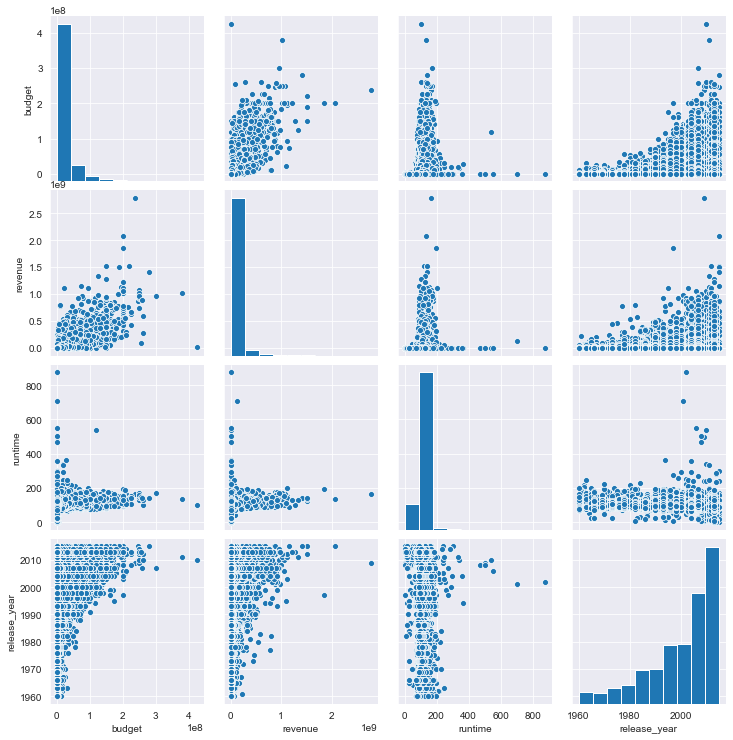

In [109]:
#Explore what the plots of the data looks like
sns.pairplot(df);

### Research Question 1  (Which month is scored the most revenues for a releasing?)

In [110]:
#Create a column for month and extractit from the release_date 
df['month'] = df['release_date'].apply(lambda x: x.month)

In [111]:
#previewing the changes in the dataset
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,month
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,6
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,5
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,3
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,12
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,4


In [112]:
#Group by month and sum the revenues.
month_revenue = df.groupby('month')['revenue'].sum()
month_revenue

month
1     12661170522
2     19119798090
3     30702309258
4     26026245427
5     49701988953
6     59623489322
7     44791583130
8     24503570373
9     25077923531
10    28593286364
11    44918349983
12    56605509311
Name: revenue, dtype: int64

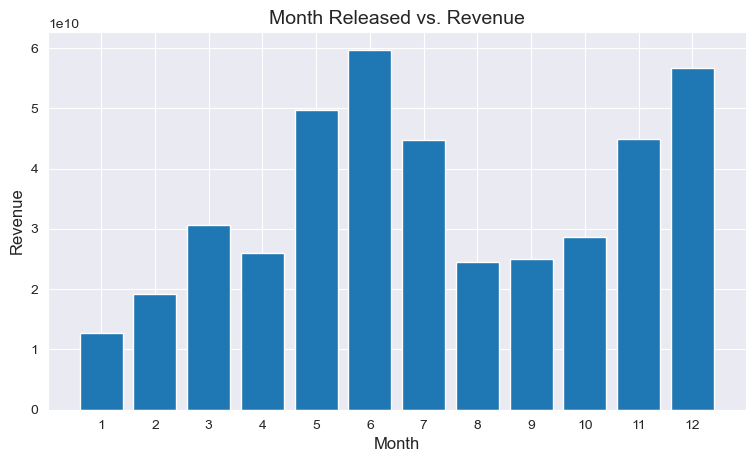

In [113]:
#Plot data in a bar chart
plt.figure(figsize=(9,5), dpi = 100)
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], month_revenue, tick_label = [1,2,3,4,5,6,7,8,9,10,11,12])
#Name of the plot
plt.title('Month Released vs. Revenue', fontsize=14)
#On y axis
plt.ylabel('Revenue', fontsize=12)
#On x-axis
plt.xlabel('Month', fontsize=12);

So the graph here show us both June and December have the most revenue for releasing movies.

### Research Question 2  (Which Movie had scored the most revenues?)

In [115]:
#Insert column for movie
df.insert(2,'movie',df['original_title'])

df.head()

,budget,revenue,movie,original_title,cast,director,tagline,runtime,genres,release_date,release_year,month
0,150000000,1513528810,Jurassic World,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,6
1,150000000,378436354,Mad Max: Fury Road,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,5
2,110000000,295238201,Insurgent,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,3
3,200000000,2068178225,Star Wars: The Force Awakens,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,12
4,190000000,1506249360,Furious 7,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,4


In [116]:
#Group by month and sum the revenues.
movie_revenue = df.groupby('revenue')['movie'].sum()
movie_revenue

revenue
0             Wild CardSurvivorMe and Earl and the Dying Gir...
2                                                      Mallrats
3             The SentinelDr. Horrible's Sing-Along BlogSoyl...
6                                       Never Talk to Strangers
9                                                     Gladiator
                                    ...                        
1513528810                                       Jurassic World
1519557910                                         The Avengers
1845034188                                              Titanic
2068178225                         Star Wars: The Force Awakens
2781505847                                               Avatar
Name: movie, Length: 4272, dtype: object

In [117]:
def calculate(column):
    #The highest revenue
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])   
    
    #Collectin data in one place
    info=pd.concat([high_details], axis=1)
    
    return info

calculate('revenue')

,1386
budget,237000000
revenue,2781505847
movie,Avatar
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00


So the most movie scored revenue is "Avatar" with column id 1386

### Research Question 3  (Which year had the most movies revenue?)

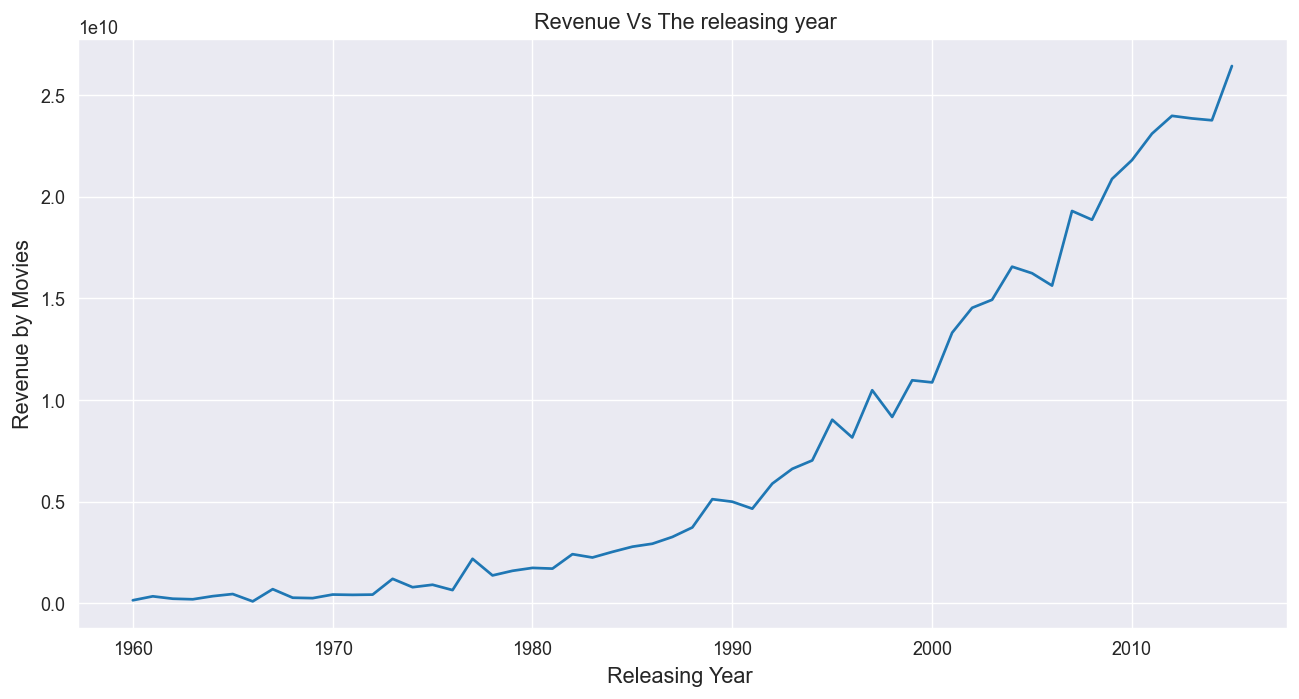

In [118]:
revenue = df.groupby('release_year')['revenue'].sum()

plt.figure(figsize=(12,6), dpi = 130)

#On x axis
plt.xlabel('Releasing Year ', fontsize = 12)
#On y axis
plt.ylabel('Revenue by Movies', fontsize = 12)
#Title of the line plot
plt.title(' Revenue Vs The releasing year')

plt.plot(revenue)

plt.show()

In [119]:

#To find that which year made the highest profit?
revenue.idxmax()

2015

The year had the most movie revenue is "2015"

### Research Question 4  (What is the percentage of the number of movies genre?)

In [137]:
#Separate genres then calculate the number of movies in each genre
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

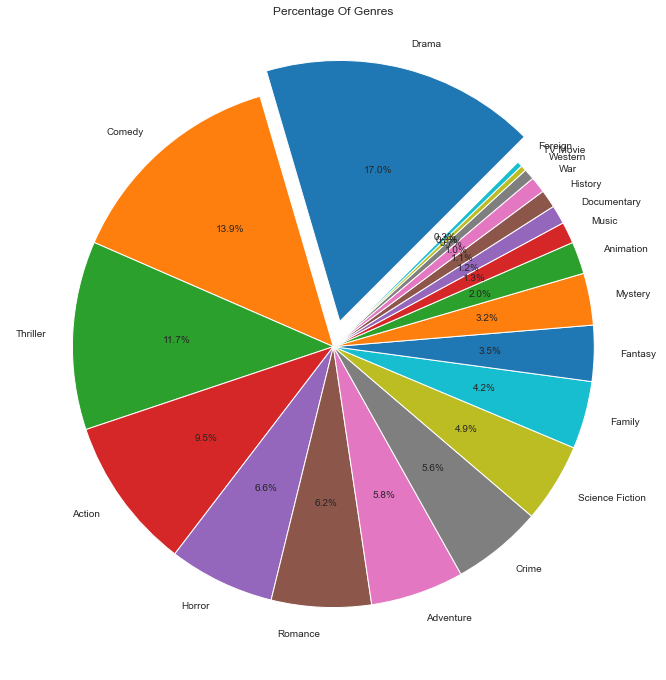

In [134]:
#Plot pie chart to see the percentage of movies genres
separate_count("genres").plot(kind="pie",figsize=(12,12),autopct="%1.1f%%", startangle=45, explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
#Title of the plot
plt.title('Percentage Of Genres')
plt.ylabel('');

In [135]:
df['genres'].describe()

count       8002
unique      1683
top       Comedy
freq         490
Name: genres, dtype: object

From the graph we can conclude that the biggest movie genres in "Drama" with 17%

<a id='conclusions'></a>
## Conclusions

In this project i investigate a TMDb dataset through pose some questions that can help who interested in this data in several directions.

So the responses for these questions have fun and interesting facts about movies, let's see how useful these data, and I'll conclude it in some points.

>It semes like there's a relationship between summer, winter and get biggest revenue from releasing movies, So investigation have shown that June and December have the most revenue for releasing movies.

>Here we face the fact of it is not necessary to be in the biggest percentage of the number of movies genres like "drama" to get the highest revenue, Here's the most highest revenue movie is "Avatar" classed as an Action, Adventure.

>The year had the most movie revenue is "2015"

>The percentage of the number of movies genre is an absolute different expectation, the Drama genre had the biggest percentage number with 17%, The Comedy had 13.9%, The Thriller had 11.7% and The Action had 9.5%.

 In the end, So I hope these investigations help any interested in the TMDb dataset well in taking his/her decision.